In [4]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [5]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def sentiment_score(sentence):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_dict = analyzer.polarity_scores(sentence)
    # The compound score is between -1 and 1
    compound_score = sentiment_dict['compound']
    # Scale the compound score to a 1-10 range
    sentiment_score = (compound_score + 1) * 5
    return round(sentiment_score, 2)

# Example usage
# sentence = "I love this new product, it’s amazing!"
# score = sentiment_score(sentence)
# print(f"The sentiment score is: {score}")


In [7]:
# load the train data from the tsv file

import pandas as pd

# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('./liar_dataset/test.tsv', sep='\t', names=header)
train_data = pd.read_csv('./liar_dataset/train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', names=header)

In [8]:
train_data.head()

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [13]:
# create a list of the statements
statements = train_data['statement'].tolist()
# create a list of score for each statement
scores = []

# for each statement in the list of statements use sentiment_score function to get the score and append it to the scores list
for statement in statements:
    score = sentiment_score(statement)
    scores.append(score)
    
# add the scores list to the train_data dataframe
train_data['sentiment_score'] = scores


In [ ]:
# print train data with the sentiment score as dataframe
train_data.head()


,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,sentiment_score
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,6.25
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,6.81
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,6.59
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,8.79
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,5.00


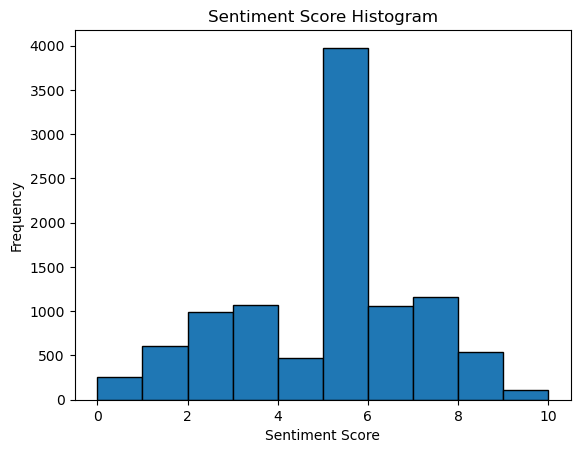

In [ ]:
# plot a histogram of the sentiment scores
import matplotlib.pyplot as plt

plt.hist(train_data['sentiment_score'], bins=10, range=(0, 10), edgecolor='black')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Histogram')
plt.show()




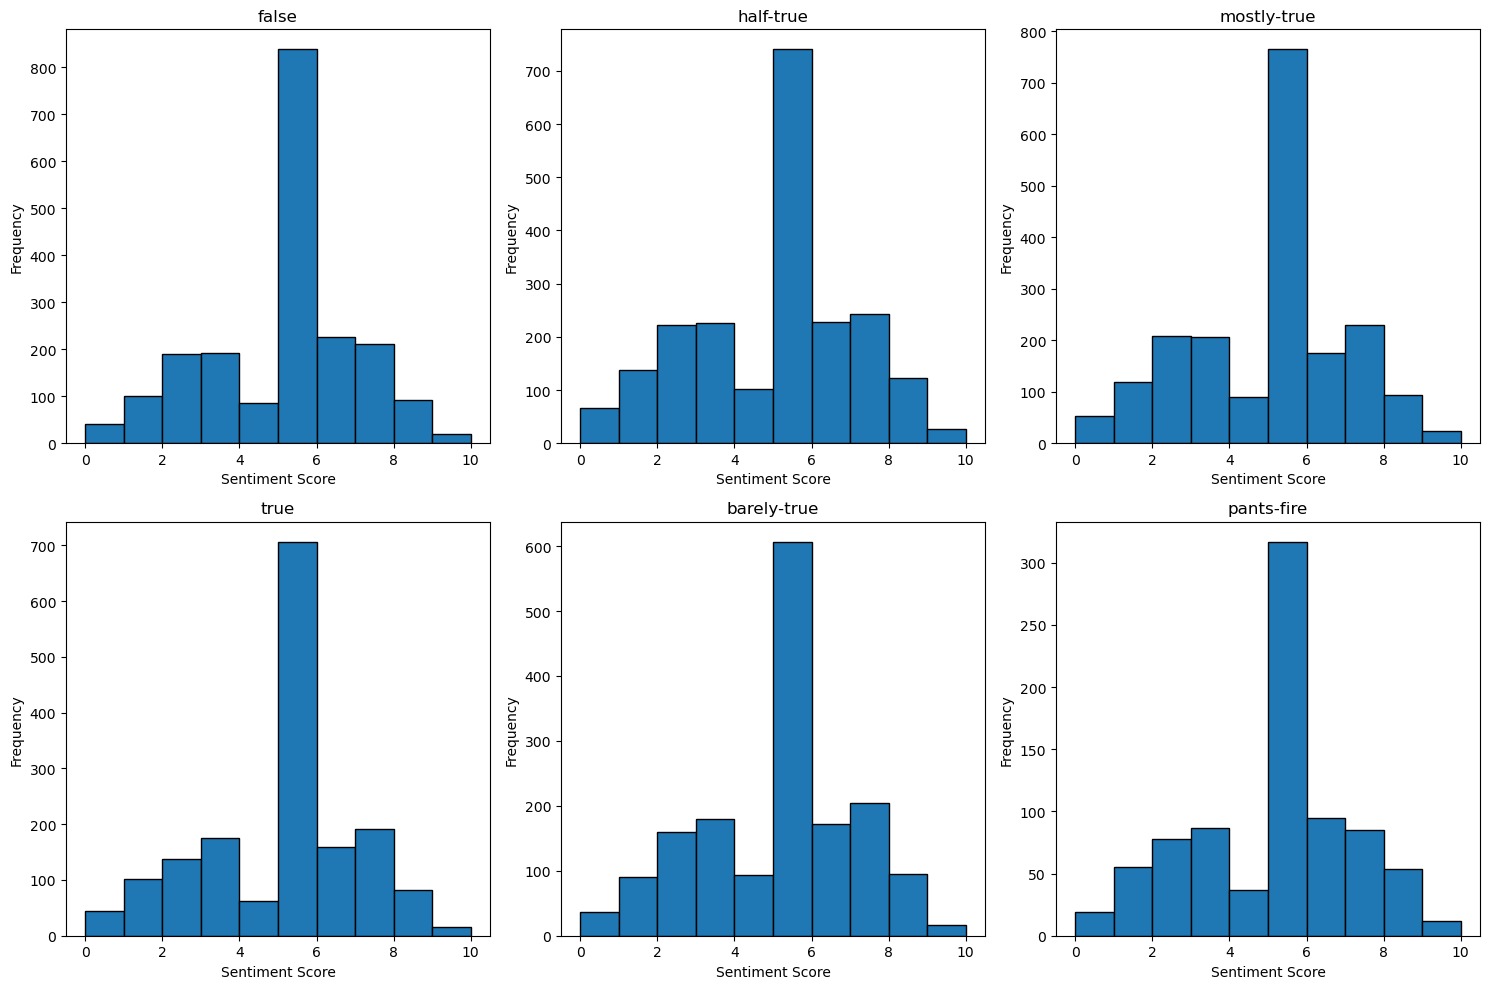

In [ ]:
# make a sub plot for each of the labels and plot the sentiment score histogram for each label
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# get the unique labels
labels = train_data['label'].unique()

# for each label plot the sentiment score histogram

for i, label in enumerate(labels):
    row = i // 3
    col = i % 3
    data = train_data[train_data['label'] == label]
    axs[row, col].hist(data['sentiment_score'], bins=10, range=(0, 10), edgecolor='black')
    axs[row, col].set_title(label)
    axs[row, col].set_xlabel('Sentiment Score')
    axs[row, col].set_ylabel('Frequency')
    
plt.tight_layout()
plt.show()


In [ ]:
pip install transformers


In [ ]:
from transformers import pipeline

# Load the sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

def sentiment_score_bert(sentence):
    result = sentiment_pipeline(sentence)[0]
    label = result['label']
    score = result['score']
    # Map BERT scores to a 1-10 scale
    if label == 'NEGATIVE':
        sentiment_score = score * 5
    else:
        sentiment_score = score * 5 + 5
    return round(sentiment_score, 2)

# # Example usage
# sentence = "I love this new product, it’s amazing!"
# score = sentiment_score(sentence)
# print(f"The sentiment score is: {score}")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
# for each statement in the list of statements use sentiment_score function to get the score and append it to the scores list
bert_scores = []
for statement in statements:
    score = sentiment_score_bert(statement)
    bert_scores.append(score)
    
# add the scores list to the train_data dataframe
train_data['bert_sentiment_score'] = bert_scores

Token indices sequence length is longer than the specified maximum sequence length for this model (714 > 512). Running this sequence through the model will result in indexing errors


RuntimeError: The size of tensor a (714) must match the size of tensor b (512) at non-singleton dimension 1

In [14]:
from transformers import LongformerTokenizer, LongformerForSequenceClassification
from transformers import pipeline

# Load the Longformer tokenizer and model
tokenizer = LongformerTokenizer.from_pretrained('allenai/longformer-base-4096')
model = LongformerForSequenceClassification.from_pretrained('allenai/longformer-base-4096')

sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

def sentiment_score_longformer(sentence):
    tokens = tokenizer.tokenize(sentence)
    if len(tokens) > 4096:
        tokens = tokens[:4096]  # Truncate tokens to the first 4096 tokens
        truncated_sentence = tokenizer.convert_tokens_to_string(tokens)
    else:
        truncated_sentence = sentence
    result = sentiment_pipeline(truncated_sentence)[0]
    label = result['label']
    score = result['score']
    # Map Longformer scores to a 1-10 scale
    if label == 'NEGATIVE':
        sentiment_score = score * 5
    else:
        sentiment_score = score * 5 + 5
    return round(sentiment_score, 2)


longformer_scores = []
for statement in statements:
    score = sentiment_score_longformer(statement)
    longformer_scores.append(score)

# Ensure the length of scores matches the DataFrame
if len(longformer_scores) == len(train_data):
    train_data['longformer_sentiment_score'] = longformer_scores
else:
    print("The number of statements does not match the number of rows in the DataFrame.")


Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
